# Modelling
## Setup

In [25]:
from dotenv import load_dotenv
from pathlib import Path
import os

In [26]:
load_dotenv()  # Load environment variables from .env file
PARENT = Path(os.getcwd()).parent

DATA_DIR_PROCESSED = Path(os.getenv("DATA_DIR_PROCESSED"))
DATA_DIR_PROCESSED = PARENT / DATA_DIR_PROCESSED

MODEL_DIR = Path(os.getenv("MODEL_DIR"))
MODEL_DIR = PARENT / MODEL_DIR

In [27]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [28]:
X_train = pd.read_csv(DATA_DIR_PROCESSED / "X_train_preprocessed.csv")
y_train = pd.read_csv(DATA_DIR_PROCESSED / "y_train.csv")
X_test = pd.read_csv(DATA_DIR_PROCESSED / "X_test_preprocessed.csv")
y_test = pd.read_csv(DATA_DIR_PROCESSED / "y_test.csv")

In [29]:
preproc = joblib.load(MODEL_DIR / "preprocessor.pkl")

## Model Training

In [30]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
# Store results
results = []

c:\Users\shrey\.conda\envs\bootcamp_project\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


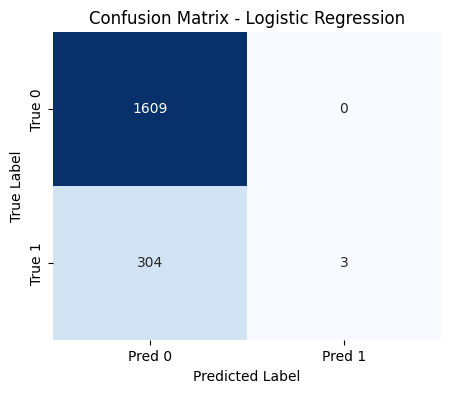

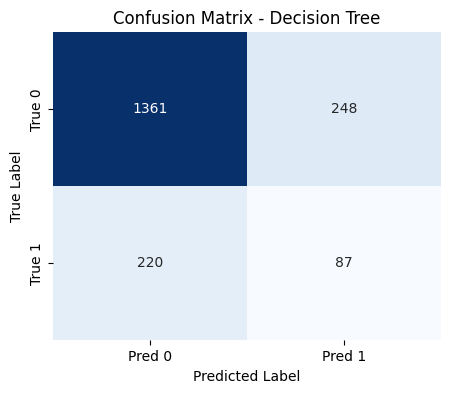

c:\Users\shrey\.conda\envs\bootcamp_project\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


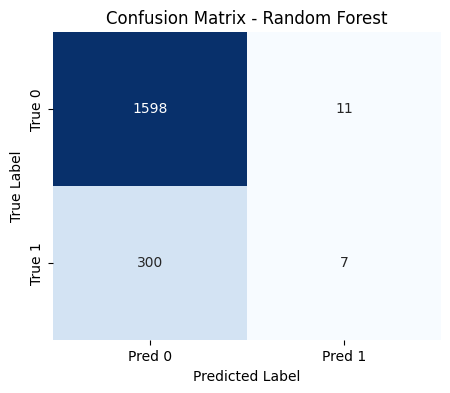

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.841336,1.000000,0.009772,0.019355,0.673279
1,Decision Tree,0.755741,0.259701,0.283388,0.271028,0.564627
2,Random Forest,0.837683,0.388889,0.022801,0.043077,0.657589


In [31]:
trained_pipelines = {}

for name, model in models.items():
    # Build pipeline: preprocessing + model
    pipeline = Pipeline([
        ('preprocess', preproc),
        ('model', model)
    ])
    
    # Fit
    pipeline.fit(X_train, y_train)
    trained_pipelines[name] = pipeline
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })
    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Results as DataFrame
results_df = pd.DataFrame(results)
results_df

In [24]:
results_df.to_csv(PARENT / "results/model_comparison.csv", index=False)

Decision Tree is the most suitable model as it has the highest F1 score.

In [32]:
# Save the Decision Tree pipeline
decision_tree_pipeline = trained_pipelines["Decision Tree"]
joblib.dump(decision_tree_pipeline, MODEL_DIR / "decision_tree_pipeline.pkl")

['c:\\Users\\shrey\\Desktop\\bootcamp_shreya_doodipala\\project\\models\\decision_tree_pipeline.pkl']

## Test reusable function

In [33]:
import sys, os
sys.path.append(os.path.abspath(".."))
from src import modelling

c:\Users\shrey\.conda\envs\bootcamp_project\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


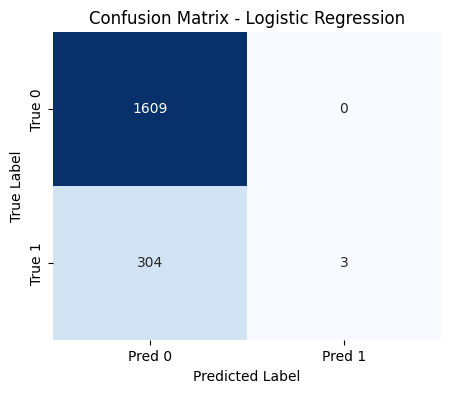

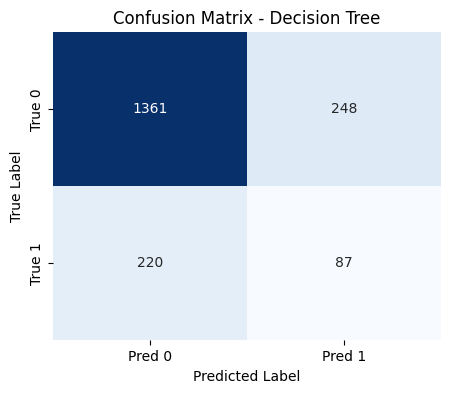

c:\Users\shrey\.conda\envs\bootcamp_project\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


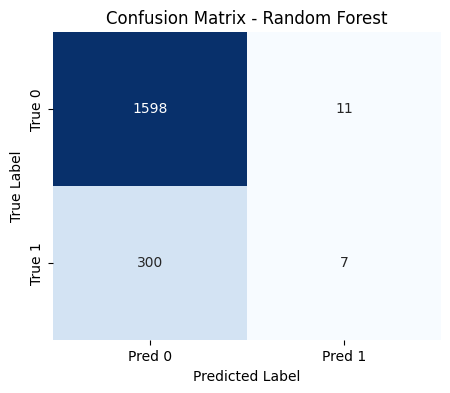

In [34]:
results, trained_pipelines = modelling.train_and_evaluate(models_dict=models, preproc=preproc, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [35]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.841336,1.000000,0.009772,0.019355,0.673279
1,Decision Tree,0.755741,0.259701,0.283388,0.271028,0.564627
2,Random Forest,0.837683,0.388889,0.022801,0.043077,0.657589
